# Diabetes Dataset KNN

#### Using resampling techniques to balance the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.Pregnancies.max()

17

#### EDA and statistical analysis

In [5]:
# Gives information about the columns, null value counts and data types.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [8]:
# Getting count of rows where value is 0 for each column
for col in df.columns:
    print(col, ':', len(df.loc[df[col] == 0]))

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [9]:
#  Glucose BloodPressure SkinThickness Insulin BMI cannot be zero. Handling false values.	
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns] = df[columns].replace(0, np.nan)

In [10]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1


In [11]:
df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [12]:
len(df.loc[df.BloodPressure == 0])

0

In [13]:
# Getting count of null values in each column 
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


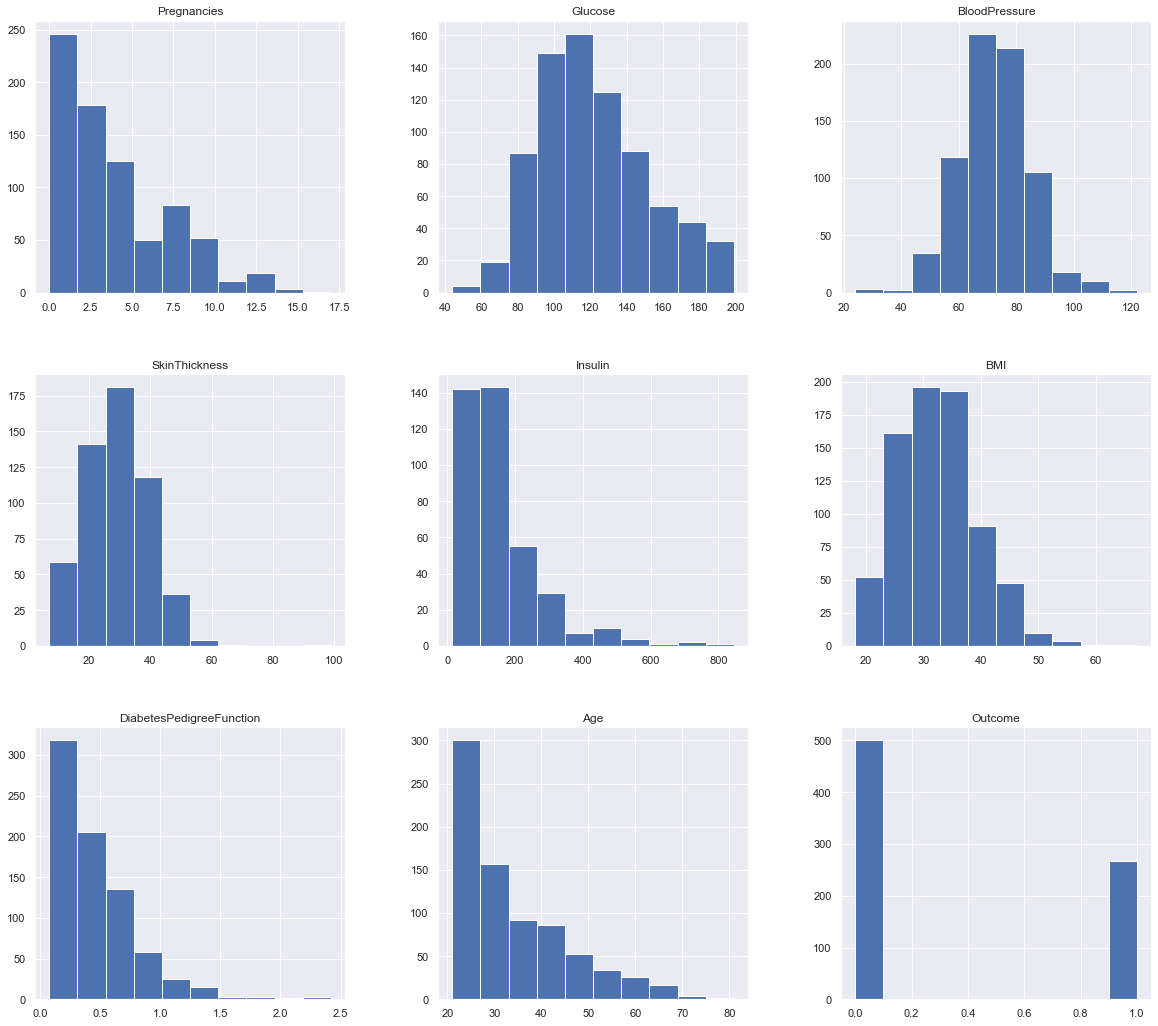

In [14]:
# To fill these Nan values the data distribution needs to be understood
p1 = df.hist(figsize=(20, 18))

In [15]:
print(df['Glucose'].mean())
print(df['Glucose'].median())

121.6867627785059
117.0


In [16]:
print(df['Insulin'].mean())
print(df['Insulin'].median())

155.5482233502538
125.0


In [17]:
print(df['BloodPressure'].mean())
print(df['BloodPressure'].median())

72.40518417462484
72.0


In [18]:
print(df['BMI'].mean())
print(df['BMI'].median())

32.45746367239099
32.3


In [19]:
print(df['SkinThickness'].mean())
print(df['SkinThickness'].median())

29.153419593345657
29.0


In [20]:
# Aiming to impute nan values for the columns in accordance with their distribution

df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)

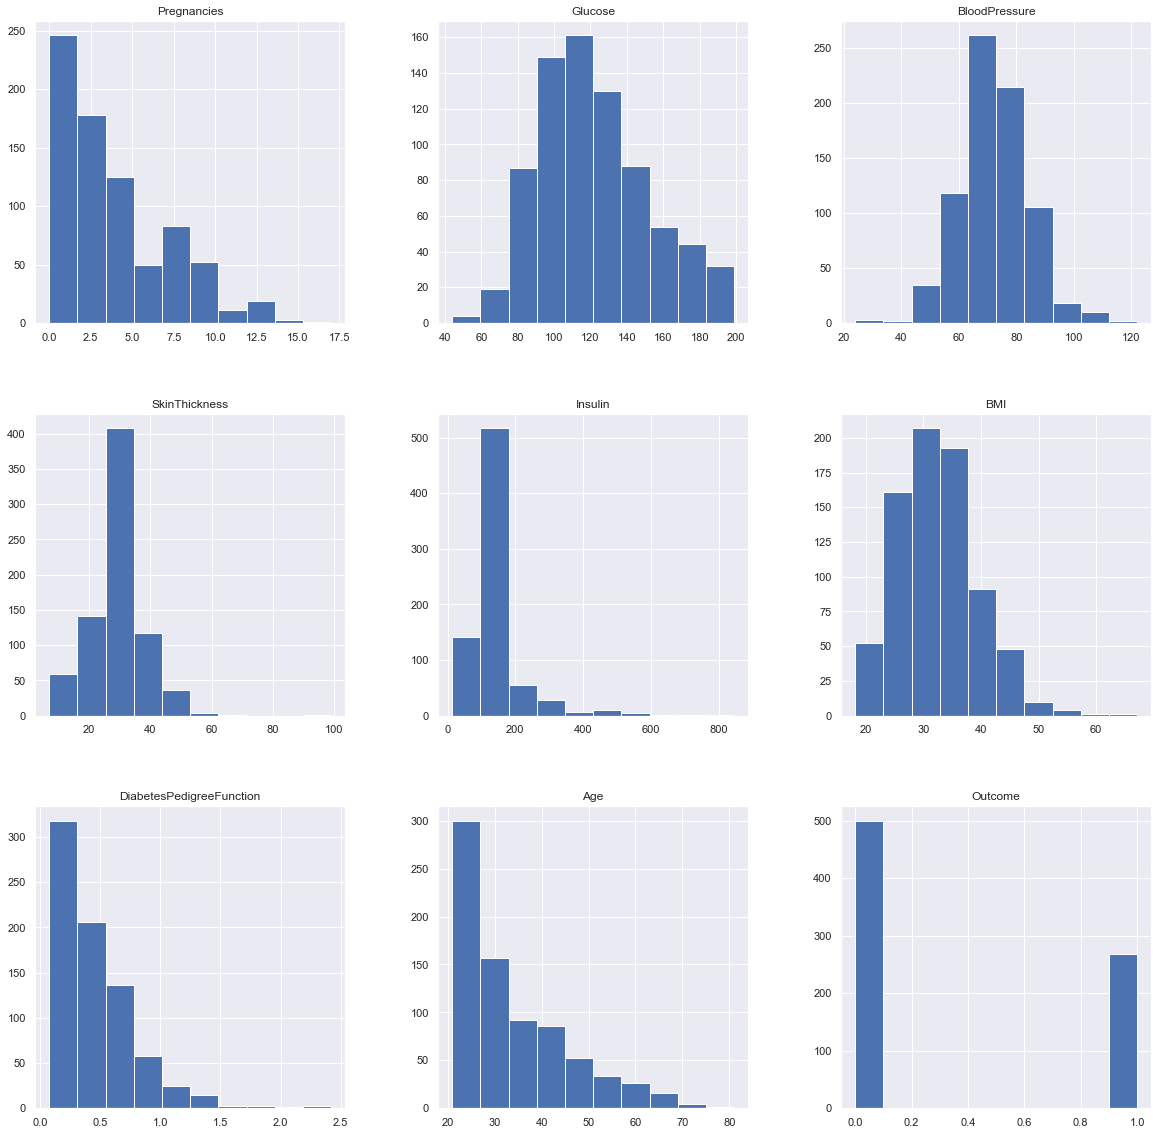

In [21]:
# Plotting after imputing NaN values
p2 = df.hist(figsize=(20, 20))

#### Checking the balance of the data by plotting the count of outcomes by their value.

0    500
1    268
Name: Outcome, dtype: int64


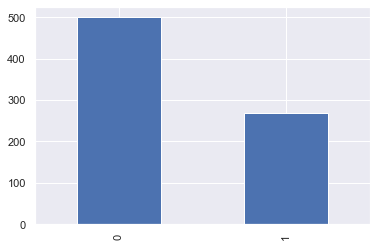

In [22]:
print(df.Outcome.value_counts())
p3 = df.Outcome.value_counts().plot(kind='bar')

### The above graph shows that the data is biased towards datapoints having outcome value as 0.<br> The number of non-diabetics is almost twice the number of diabetic patients in the dataset. Therefore, using sampling techniques to balance the dataset.

#### All the features for the model

In [23]:
features = list(df.columns)[0:-1]

In [24]:
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

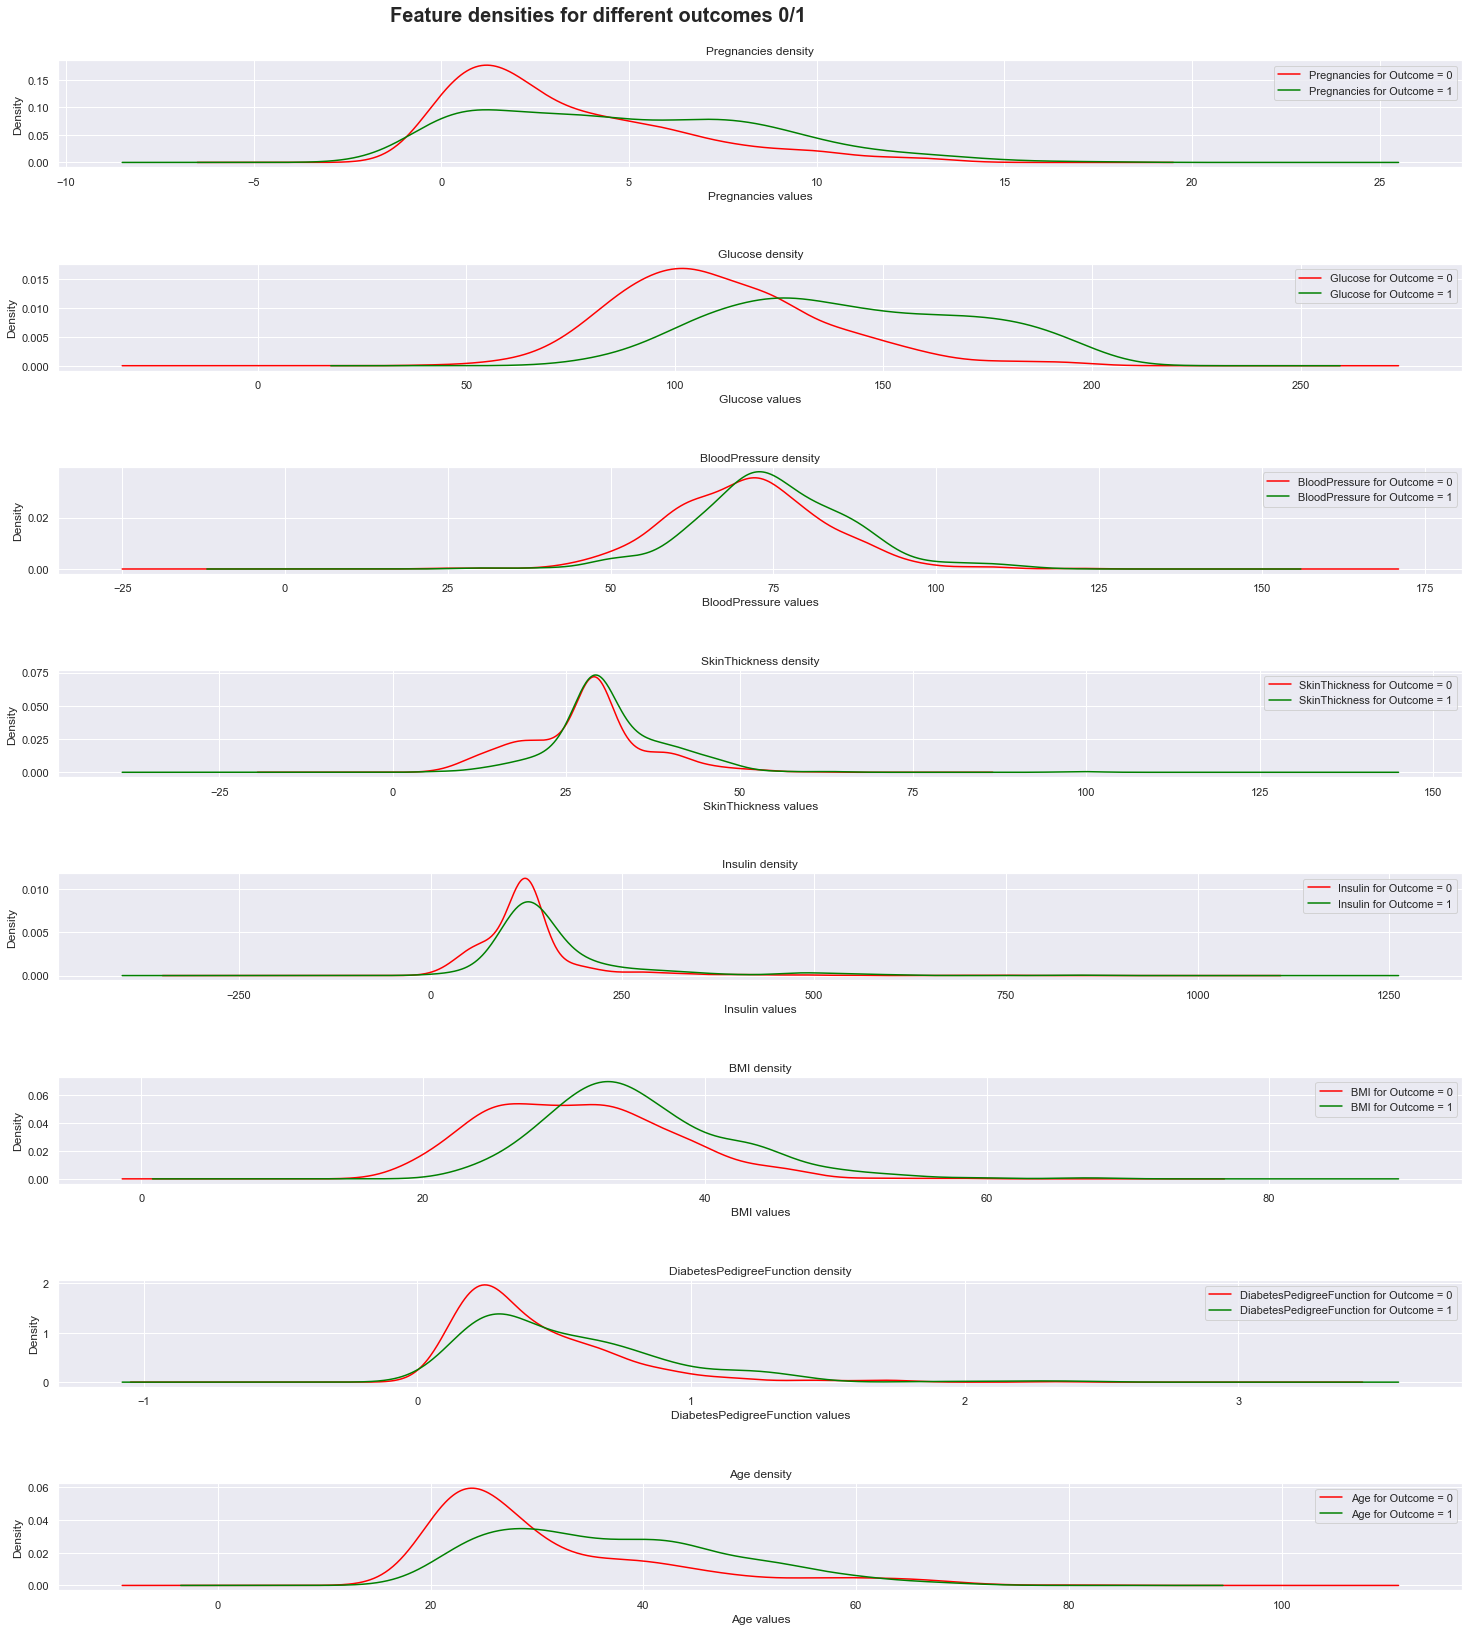

In [25]:
# Plot features' densities depending on the outcome values
def plot_densities(data, col_names):
    
    # Separate data based on outcome values 
    outcome_0 = data[data['Outcome'] == 0]
    outcome_1 = data[data['Outcome'] == 1]

    # Initilize figure
    fig, axs = plt.subplots(8, 1, figsize=(30, 25))
    fig.suptitle('Feature densities for different outcomes 0/1', fontsize=20, fontweight='bold')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95, wspace = 0.2, hspace = 0.9)

    # Plot densities for outcomes
    for column_name in col_names: 
        ax = axs[col_names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color='red', legend=True,
                                    label=column_name + ' for Outcome = 0')

        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color='green', legend=True,
                                     label=column_name + ' for Outcome = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()

# Plot correlation among outcome & feature densities
plot_densities(df, features)


    - In the plots, when the green and red curves are almost the same (overlapping), it means the feature does not separate the outcomes, whereas if the curves don't overlap then the feature has better separation of the outcome. 
    - Therefore, here the features we can take for creating a 2D visual plot are 'BMI' and 'Glucose', and also taking 'BloodPressure' for a 3D plot.

#### Creating functions for testing accuracy for each resampling technique. 

In [26]:
# All the imports (Check best position)

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [27]:
# 1. Scaling
def std_scaler(df):
    sc_X = StandardScaler()
    X = pd.DataFrame(sc_X.fit_transform(df), columns=features)
    return X    

In [28]:
# 2. Classifier model with multiple values of k

def classifier_model(k_val, x_train, y_train, x_test, y_test):
    # errors = []
    error_rate = []
    test_scores = []
    train_scores = []

    for i in range(1, k_val):

        knn = KNeighborsClassifier(i)
        knn.fit(x_train, y_train)

        pred_i = knn.predict(x_test)
        # errors.append(pred_i != y_test)
        error_rate.append(np.mean(pred_i != y_test))
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    return error_rate, train_scores, test_scores 

In [29]:
# 3. Visualization (Later subplot for each technique for better comparision)

def vis_err_vs_k(k_units, error_rate, sample_tech):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, k_units), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.xlabel('K', fontsize=18)
    plt.ylabel('Error Rate', fontsize=18)
    plt.title('Error Rate vs. K Value (%s)' % sample_tech, fontsize=18)

In [30]:
# 4. Visualization of error rate

def vis_err_rate(k_units, train_scores, test_scores, sample_tech):
    plt.figure(figsize=(12, 5))
    plt.title('Train vs Test Scores (%s)' % sample_tech, fontsize=18)
    sns.lineplot(range(1, k_units), train_scores, label='Train')
    sns.lineplot(range(1, k_units), test_scores, label='Test Score')

In [31]:
# 5. Build classifier 

def build_classifier(best_k, x_train, y_train):
    knn = KNeighborsClassifier(best_k)
    knn.fit(x_train, y_train)
    return knn

In [32]:
# 6. Setting up knn classifier with final value of k which gave minimum error and plotting confusion matrix

def classifier_final_analysis(knn_clf, x_test, y_test, sample_tech):
    print('Final Score:', round(knn_clf.score(x_test, y_test), 2))

    y_pred = knn_clf.predict(x_test)

    print(classification_report(y_test, y_pred))

    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    plot_confusion_matrix(conf_mat=cnf_matrix, figsize=(8, 8), cmap=plt.cm.YlGnBu)

    plt.ylabel('Actual', fontsize=18)
    plt.xlabel('Predicted', fontsize=18)
    plt.title('Confusion matrix (%s)' % (sample_tech), fontsize=18)

In [33]:
# 7. ROC-AUC

def roc_auc(k_val, knn_clf, x_test, y_test, sample_tech):
    y_pred_proba = knn_clf.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    aoc = round(roc_auc_score(y_test, y_pred_proba), 2)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=aoc)
    plt.plot([0, 1], [0, 1], 'k--')

    plt.legend(loc='lower right')
    plt.xlabel('fpr', fontsize=18)
    plt.ylabel('tpr', fontsize=18)
    plt.title('Knn(n_neighbors=%i) ROC curve (%s)' % (k_val, sample_tech), fontsize=18)
    
    plt.show()

### Using different resampling techniques

In [34]:
# Load libraries
import plotly.express as px
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks

In [35]:
# Separating independent and dependent variables
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [36]:
# Original
print('Original dataset shape (unsampled):', Counter(Y))

# Tomeklinks
tl = TomekLinks(sampling_strategy='majority')
x_tl, y_tl = tl.fit_sample(X, Y) # Fit predictor and target variable
print('Shape after using Tomeklinks:', Counter(y_tl))

# Nearmiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, Y)
print('Shape after using NearMiss:', Counter(y_nm))

# Smote
smote = SMOTE()
x_smote, y_smote = smote.fit_sample(X, Y)
print('Shape after using SMOTE:', Counter(y_smote))

Original dataset shape (unsampled): Counter({0: 500, 1: 268})
Shape after using Tomeklinks: Counter({0: 453, 1: 268})
Shape after using NearMiss: Counter({0: 268, 1: 268})
Shape after using SMOTE: Counter({1: 500, 0: 500})


- Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Tomek’s link exists if the two samples are the nearest neighbors of each other.

- NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class. Here it has reduced the number of rows significantly. Chances of overfitting the model are very high. (Not recommended) 

- SMOTE (Synthetic Minority Oversampling Technique) This technique generates synthetic data for the minority class.
It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [37]:
# Creating lists for iteration
resampled_df_x = [X, x_tl, x_nm, x_smote]
resampled_df_y = [Y, y_tl, y_nm, y_smote]

In [38]:
y_smote.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [39]:
# Need to create a copy for kde plot (Can be done for other techniques too)
smote_df = x_smote.copy()
smote_df['Outcome'] = y_smote

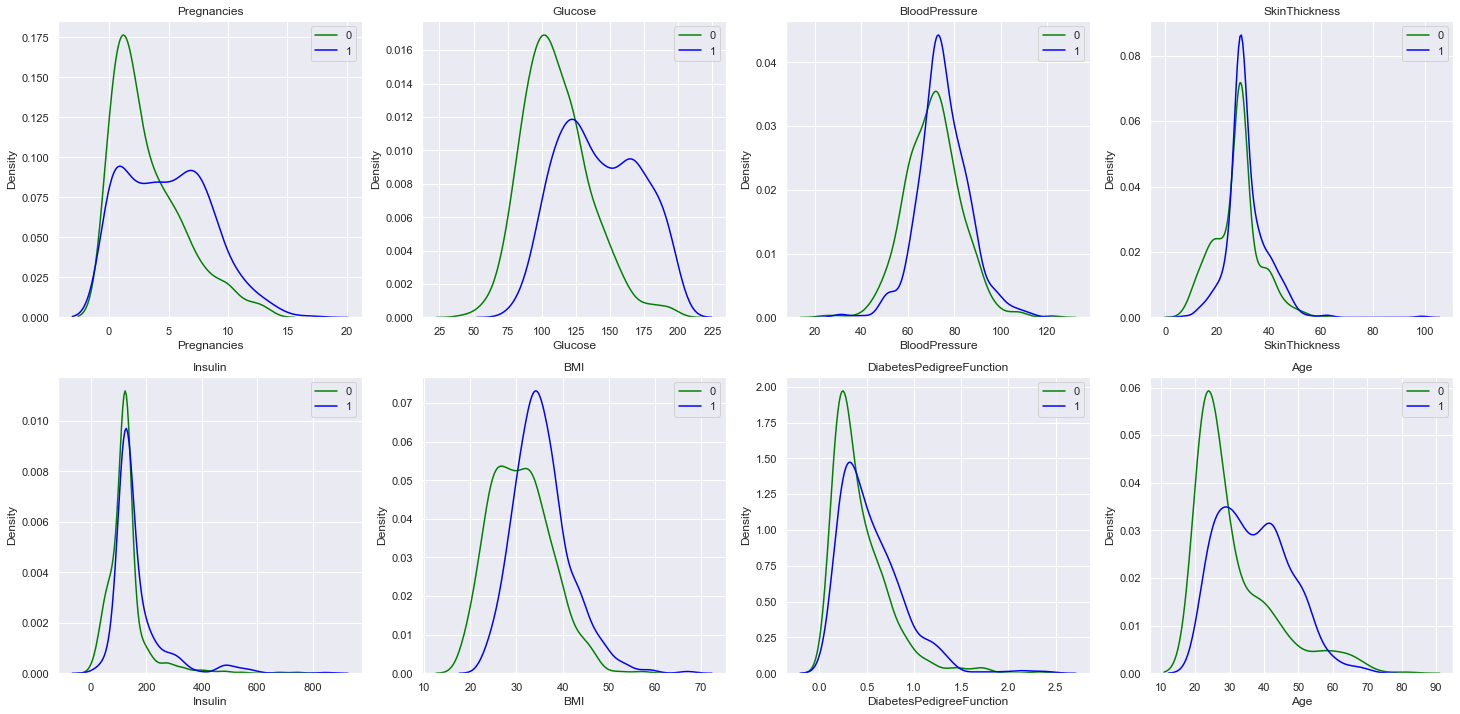

In [40]:
# Density plot between outcome after balancing values
plt.figure(figsize=(25, 12))

for i in range(1, smote_df.shape[1]):
    plt.subplot(2, 4, i)
    plt.title(smote_df.columns[i-1])

    sns.kdeplot(smote_df.loc[smote_df['Outcome']==0, smote_df.columns[i-1]], color='green', label=0)
    sns.kdeplot(smote_df.loc[smote_df['Outcome']==1, smote_df.columns[i-1]], color='blue', label=1)
    plt.legend()

#### Looping for all sampling techniques

Original
(768, 8)
Min Error Rate: 0.2344
Mean test score 0.7407 
Final Score: 0.73
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       167
           1       0.62      0.58      0.60        89

    accuracy                           0.73       256
   macro avg       0.70      0.70      0.70       256
weighted avg       0.73      0.73      0.73       256



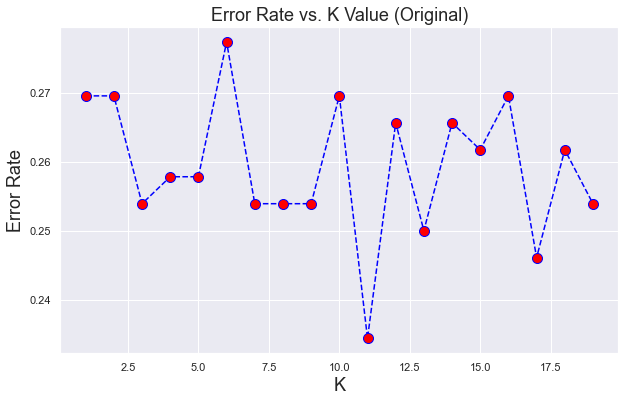

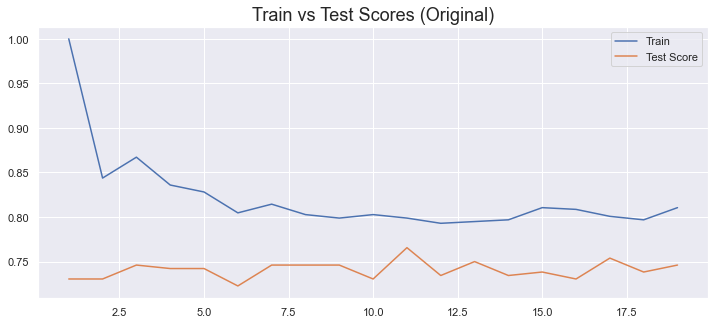

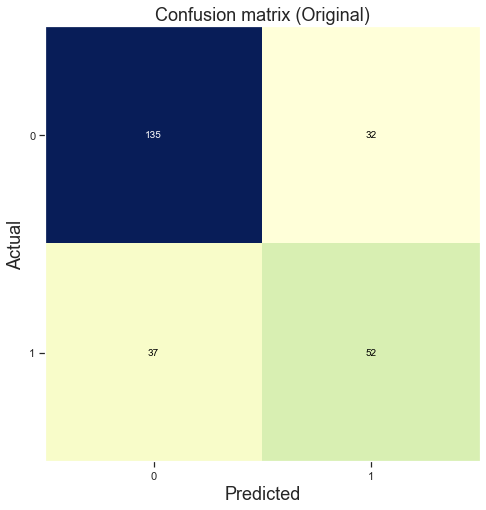

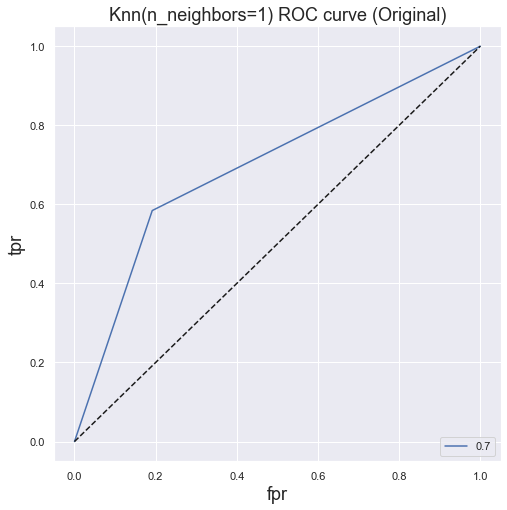

TomekLinks
(721, 8)
Min Error Rate: 0.2158
Mean test score 0.7672 
Final Score: 0.72
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       151
           1       0.64      0.56      0.60        90

    accuracy                           0.72       241
   macro avg       0.70      0.69      0.69       241
weighted avg       0.71      0.72      0.71       241



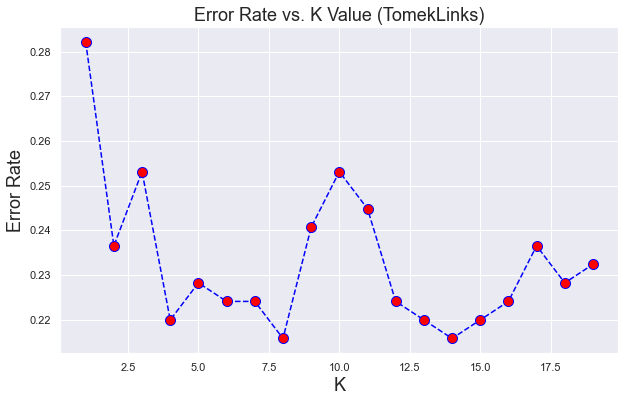

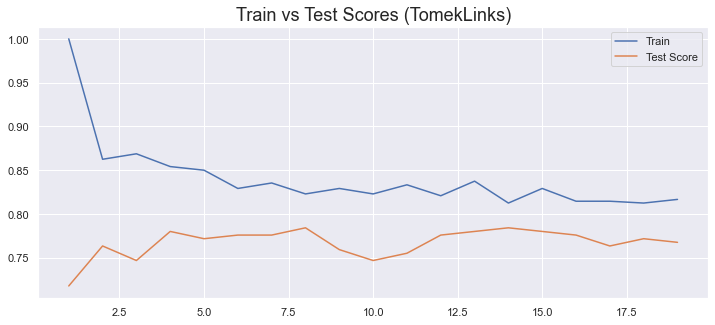

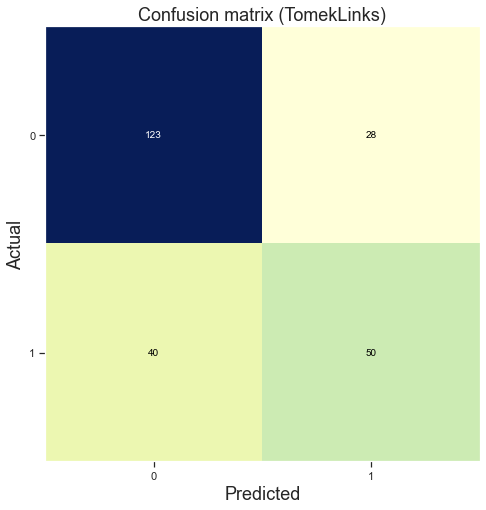

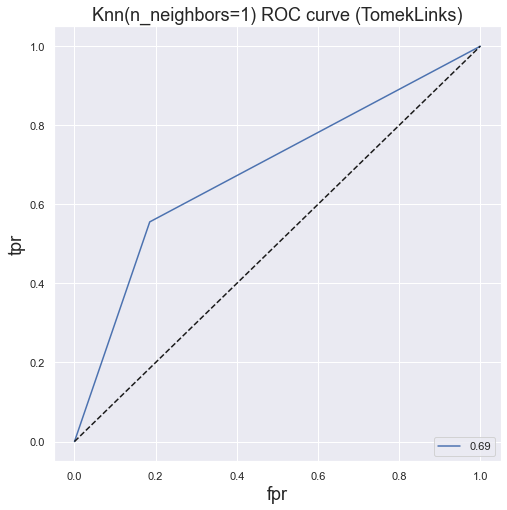

NearMiss
(536, 8)
Min Error Rate: 0.2067
Mean test score 0.7451 
Final Score: 0.68
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        90
           1       0.72      0.60      0.65        89

    accuracy                           0.68       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.69      0.68      0.68       179



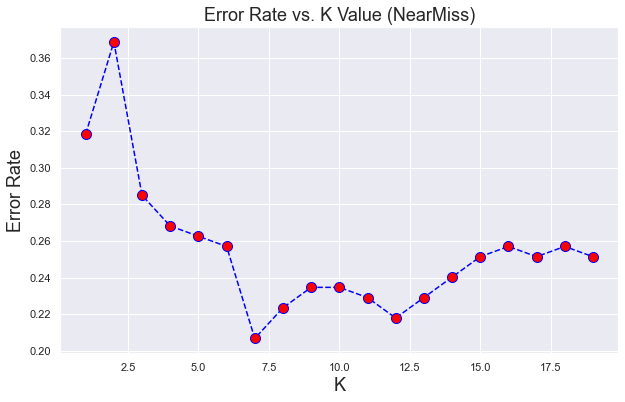

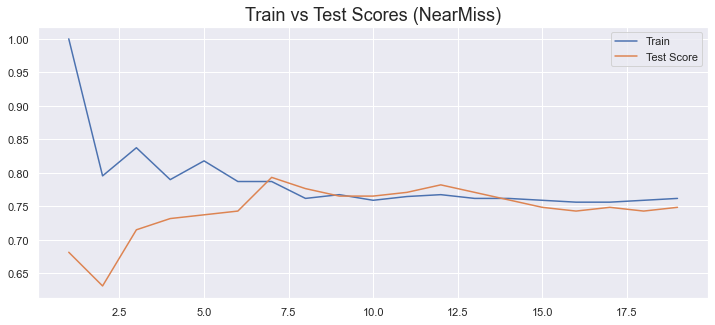

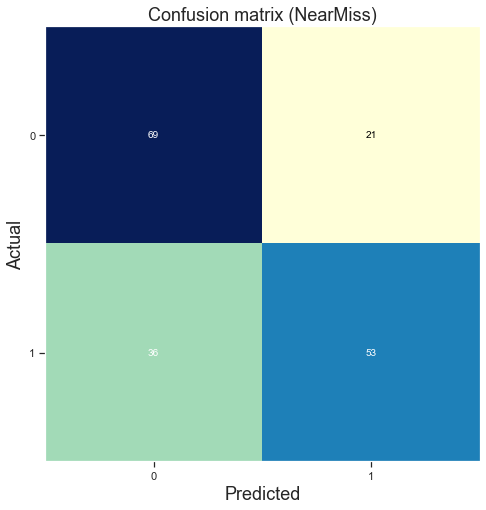

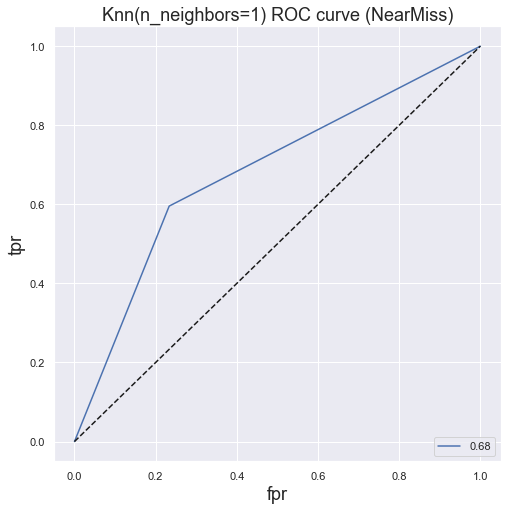

SMOTE
(1000, 8)
Min Error Rate: 0.1886
Mean test score 0.7896 
Final Score: 0.79
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       167
           1       0.76      0.87      0.81       167

    accuracy                           0.79       334
   macro avg       0.80      0.79      0.79       334
weighted avg       0.80      0.79      0.79       334



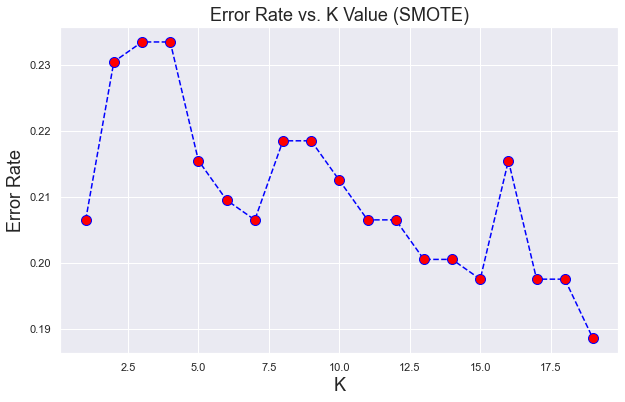

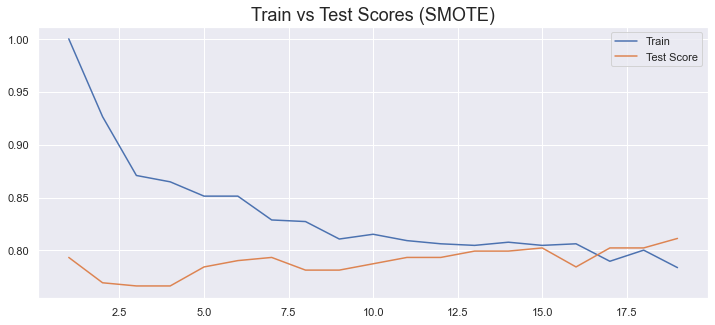

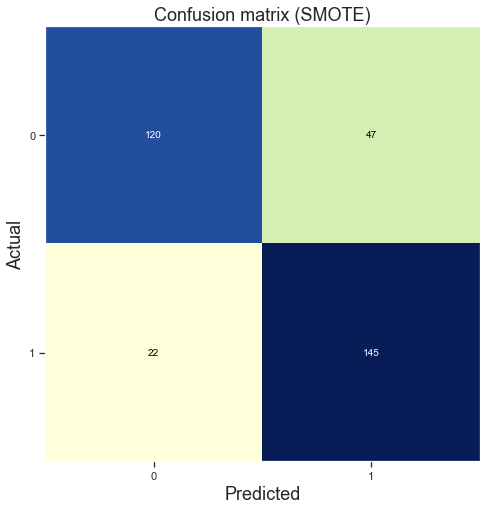

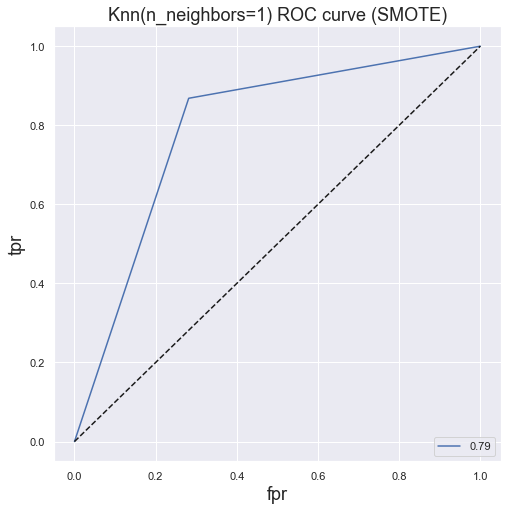

In [44]:
# Variables to be used
counter = 0
sample_techs = ['Original', 'TomekLinks', 'NearMiss', 'SMOTE']

for i in resampled_df_x:
    print(sample_techs[counter])
    print(i.shape)

    # 1. Scaling    
    scaled_x = std_scaler(i)
    
    # 1.5 Train test split
    x_train, x_test, y_train, y_test = train_test_split(scaled_x, resampled_df_y[counter], test_size=1/3, random_state=42, stratify=resampled_df_y[counter])
    
    # 2. Classifier model with multiple values of k as a parameter
    error_rate, train_scores, test_scores = classifier_model(20, x_train, y_train, x_test, y_test)

    # 2.5 Minimum error rate
    print('Min Error Rate:', (round(min(error_rate), 4)))

    # 3. Getting max train and test scores
    max_train_score = max(train_scores)
    train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
    
    best_k_values = list(map(lambda x: x+1, train_scores_index))

    # print('Max train score {} and k = {}'.format(round(max(train_scores), 4), best_k_values))
    print('Mean test score {} '.format(round(np.mean(test_scores), 4)))

    # 4. Visualization
    vis_err_vs_k(20, error_rate, sample_techs[counter]) 

    # 5. Visualization of error rate
    vis_err_rate(20, train_scores, test_scores, sample_techs[counter])
    
    # 6. Build classifier
    knn_clf = build_classifier(best_k_values[0], x_train, y_train)

    # 6.5 Setting up knn classifier with k neighbours (k value which gives minimum error) and performance analysis
    classifier_final_analysis(knn_clf, x_test, y_test, sample_techs[counter])

    # 7. ROC-AUC curve
    roc_auc(best_k_values[0], knn_clf, x_test, y_test, sample_techs[counter])

    # 8. 3D Plot
    fig = px.scatter_3d(scaled_x, x='BMI', y='Glucose', z='BloodPressure', color=resampled_df_y[counter])
    fig.show()

    counter += 1